##### <center> MINISTERE DE L’ENSEIGNEMENT SUPERIEUR  ET DE LA RECHERCHE SCIENTIFIQUE <br/> UNIVERSITE DE SOUSSE </center>

### <center>Institut Supérieur d’Informatique et de Technique de Communication </center>           <img src="isitcom.png"> 
### <center>المعهد العالي للإعلامية و تقنيات الاتصال بحمام سوسة</center>

## <center>Analyse Numerique</center>

# <center> <span style="color:blue">TP2 Interpolation Numérique
</span></center>
<hr>

###  <center> Réalisé par : <br> Mrad Haythem  <br> 2DNI1<center> <hr>

#### <center> Année Universitaire 2020 – 2021 <center>
<hr>

## exercice 1

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

In [5]:
import numpy as np
def PR(x,y,c):
    s=[]
    l=[]
    n=len(x)
    for i in range(n):
        l=[ c-k for k in x ]
        for j in range (n):
            if j==i : 
                l[j]=1
            else : 
                l[j]= l[j]/(x[i]-x[j])
        s.append(y[i]*np.prod(l))
    return np.sum(s)
                

In [6]:
x=[1,2,3,4]
y=[-1,0,2,1]
for i in x: 
    print(PR(x,y,i))

-1.0
0.0
2.0
1.0


2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [7]:
def PR_2(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*np.prod(L))

            return L[3]

In [8]:
X=[1 ,2 ,3 ,4]
Y=[-1, 0, 2 ,1]
for i in X:
    print(PR_2(X,Y,i))


1
1
1
1


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

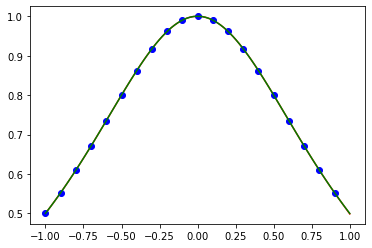

In [9]:
import numpy as np
import matplotlib.pyplot as plt
pt=[]
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(PR(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f(t),"g")
plt.show()

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,2.5)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f1=np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(PR(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f1(t),"g")
plt.show()

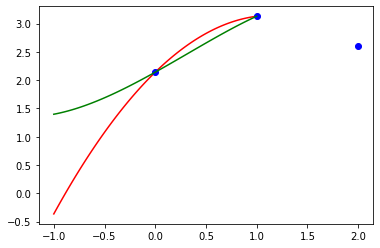

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,2.5)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f1=np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(PR(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f1(t),"g")
plt.show()

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

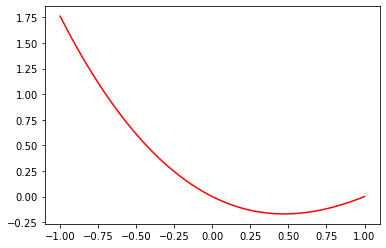

In [11]:
plt.plot(t,f1(t)-pt,"r")
plt.show()

## Exercice 2 ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

In [18]:
def PIL(N):
    X=np.linspace(-5,5,N)
    f= lambda x:1/(1+x**2)
    Y=f(X);
    p=np.polyfit(X,Y,N-1)
    t=np.linspace(-5,5,1000)
    plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
    plt.title("Interpolation Equidistante avec N = "+ str(N))

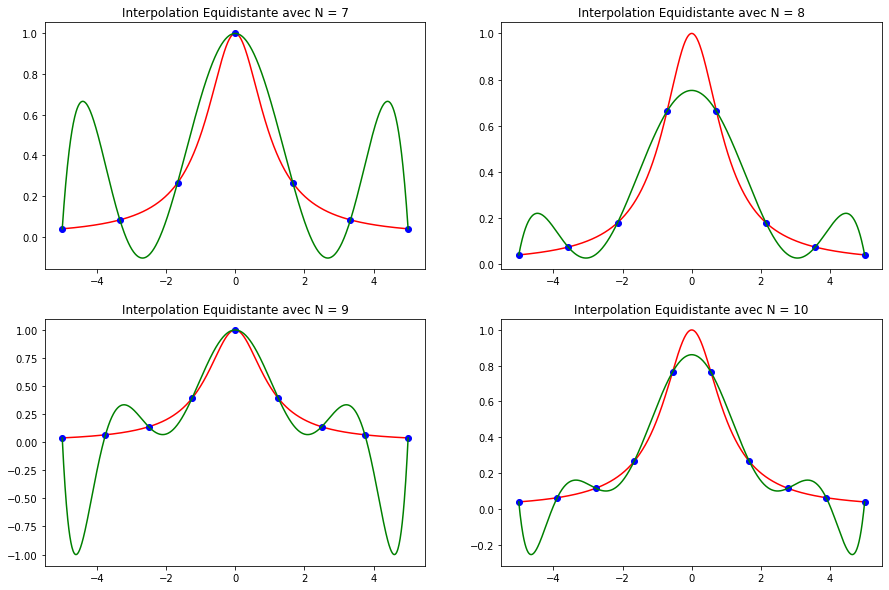

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(15, 10))
plt.subplot(221)
PIL(7)
plt.subplot(222)
PIL(8)
plt.subplot(223)
PIL(9)
plt.subplot(224)
PIL(10)
plt.show()

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [24]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [25]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

In [28]:
def Tchebycheff(N):
    Yt=[]
    f = lambda x:1/(1+x**2)
    Xt=tcheb(-7,7,N)
    for i in Xt:
        Yt.append(f(i))
    pt=np.polyfit(Xt,Yt,N-1)
    plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
    plt.title("Interpolation Tchebycheff avec N= "+str(N))

<ipython-input-29-f6229d4e0528>:4: RankWarning: Polyfit may be poorly conditioned
  Tchebycheff(10)
<ipython-input-29-f6229d4e0528>:6: RankWarning: Polyfit may be poorly conditioned
  Tchebycheff(11)
<ipython-input-29-f6229d4e0528>:8: RankWarning: Polyfit may be poorly conditioned
  Tchebycheff(16)
<ipython-input-29-f6229d4e0528>:10: RankWarning: Polyfit may be poorly conditioned
  Tchebycheff(17)


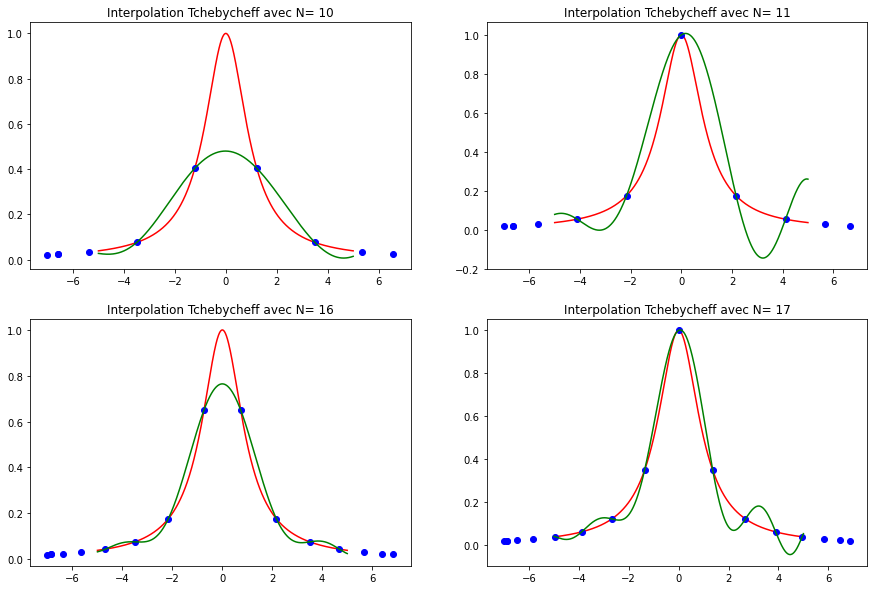

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(15, 10))
plt.subplot(221)
Tchebycheff(10)
plt.subplot(222)
Tchebycheff(11)
plt.subplot(223)
Tchebycheff(16)
plt.subplot(224)
Tchebycheff(17)
plt.show()

## Exercice 3

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [214]:
import numpy as np 
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m): #f(k:m)=(y(k:m)-y(k-1:m-1))./(x(k:m)-x(1:m+1-k))
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [218]:
x=[-1 ,0 ,2 ,5]
y=[6, 1, 3 ,66]
m=len(x)
f=intN(x,y)
print('f=',f)

f= [ 0.         -5.          0.66666667 10.5       ]


In [228]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [229]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p =intNval(x,y,t)
print('p=',p)

p= [   7. -118.   27.  838.]


2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

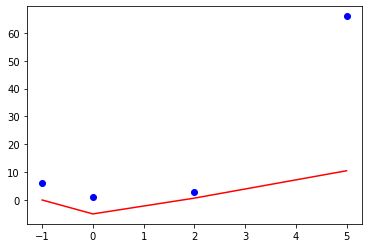

In [220]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [231]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
print(p[0])

7.0


4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.